# Test 2016-06-13

## 문제 1.

다음 데이터는 뉴욕시의 레스토랑을 평가한 자료이다. 각 열은 다음과 같은 의미를 가진다.

* Case: 레스토랑 번호
* Restaurant: 레스토랑 이름
* Price: 저녁 식사 가격 (US$)
* Food: 식사에 대한 고객 평가 점수 (1~30)
* Decor: 인테리어에 대한 고객 평가 점수 (1~30)
* Service: 서비스에 대한 고객 평가 점수 (1~30)
* East: 뉴욕 동부에 위치한 경우 1, 아니면 0

In [1]:
df1 = pd.read_csv("nyc.csv", encoding = "ISO-8859-1")
df1.head(2)

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0


이 데이터를 이용하여 저녁 식사 가격을 예측하는 선형 회귀 모형을 작성하고 다음 질문에 답하라 (주의 사항: `from_formula` 메서드를 사용하여 작성할 것)

1. 가격을 결정하는데 가장 영향력이 작은 요인은 무엇인가? t-검정을 통해 확인하라.
2. 뉴욕 동부에 위치한 결과로 생기는 가격 프리미엄은 얼마인가? 이 값이 추가적인 의미가 있는지를 확인하는 ANOVA 분석을 실시하라. (유의 수준 1%)


## 답

다음과 같은 점에 유의하여 모형을 작성했는지 검토

* 모든 feature가 같은 스케일을 가지고 있으므로 별도의 스케일은 필요없다.
* East 는 category 값이므로 `C()` 를 사용한다.



In [2]:
model1 = sm.OLS.from_formula("Price ~ Food + Decor + Service + C(East)", data=df1)
result1 = model1.fit()
print(result1.summary())
#1부터 30이라서 굳이 스케일링을 하지 않아도 되는 문제였다.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           5.35e-34
Time:                        09:49:52   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -24.0238      4.708     -5.102   

* t-검정의 유의 확률이 가장 큰 것은 Service
* 동부에 위치한 프리미엄은 East의 계수, 즉 약 2 달러 (2.0681)

In [3]:
sm.stats.anova_lm(result1)
#Food의 F값이 가장 크기 때문에 영향력이 가장 크다.

,df,sum_sq,mean_sq,F,PR(>F)
C(East),1.0,502.313658,502.313658,15.257019,1.371938e-04
Food,1.0,5248.583781,5248.583781,159.417813,6.347591e-26
Decor,1.0,3304.097144,3304.097144,100.356965,1.045660e-18
Service,1.0,0.001560,0.001560,0.000047,9.945162e-01
Residual,163.0,5366.521715,32.923446,NaN,NaN


C(East)의 ANOVA 유의 확률은 0.0001371938 이므로 유의하다.

## 문제 2

다음 데이터를 이용하여 자동차의 가격을 결정하기 위한 모형을 작성하라. 각 열은 다음과 같은 의미를 가진다.

* EngineSize: 엔진 배기량
* Cylinders: 실린더 수
* Horsepower: 마력
* HighwayMPG: 연비
* Weight: 중량
* WheelBase: 축간 거리
* Hybrid: 하이브리드 차량이면 1
* SuggestedRetailPrice: 권장 소비자 가격


모형 작성시 다음과 같은 순서로 작성하라

1. 각 요인을 그대로 사용한 모형(model1)을 작성한다.
2. 요인에 대한 스케일링 및 변환이 필요한 경우 이를 고려한 새로운 모형(model2)을 작성한다.
 * 새로운 모형은 Adjusted R-squared 0.8 이상, condition number가 1000 이하
 * Adjusted R-squared 를 최대화

In [4]:
df20 = pd.read_csv("cars04.csv")
df2 = df20[["EngineSize", "Cylinders", "Horsepower", "HighwayMPG", "Weight", "WheelBase", "Hybrid", "SuggestedRetailPrice"]]
df2.head(2)

,EngineSize,Cylinders,Horsepower,HighwayMPG,Weight,WheelBase,Hybrid,SuggestedRetailPrice
0,1.6,4,103,34,2370,98,0,11690
1,1.6,4,103,34,2348,98,0,12585


## 답


In [5]:
model2 = sm.OLS.from_formula("SuggestedRetailPrice ~ EngineSize + Cylinders + Horsepower + HighwayMPG + Weight + WheelBase + C(Hybrid)", data=df2)
result2 = model2.fit()
print(result2.summary())

                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.782
Model:                              OLS   Adj. R-squared:                  0.775
Method:                   Least Squares   F-statistic:                     115.7
Date:                  Fri, 09 Sep 2016   Prob (F-statistic):           4.36e-71
Time:                          10:01:27   Log-Likelihood:                -2416.9
No. Observations:                   234   AIC:                             4850.
Df Residuals:                       226   BIC:                             4877.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -6.897e+0

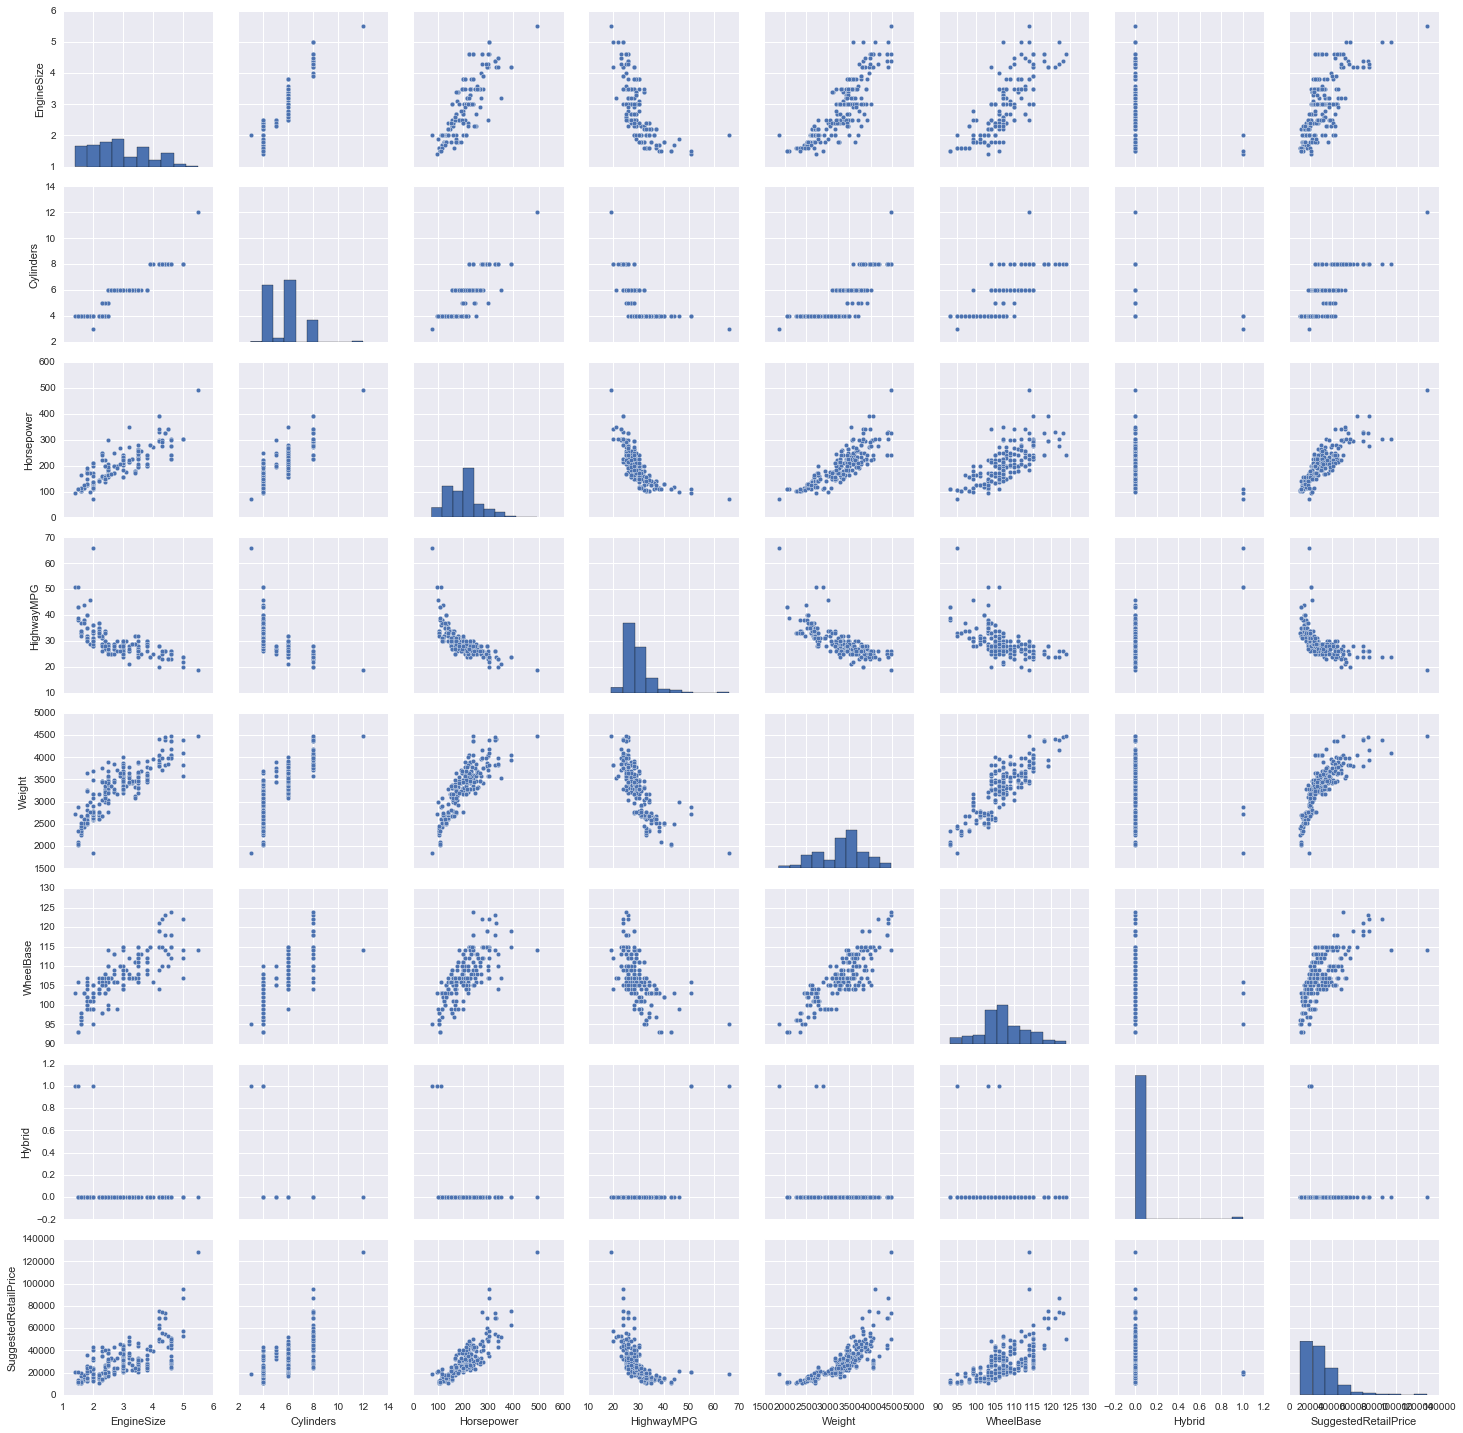

In [6]:
sns.pairplot(df2)
plt.show()

In [7]:
df30 = pd.DataFrame(index=df2.index)
df30["EngineSize"] = df2.EngineSize
df30["LogCylinders"] = np.log(df2.Cylinders)
df30["LogHorsepower"] = np.log(df2.Horsepower)
df30["LogHighwayMPG"] = np.log(df2.HighwayMPG)
df30["Weight"] = df2.Weight
df30["LogWheelBase"] = np.log(df2.WheelBase)
df30["Hybrid"] = df2.Hybrid
df30["LogSuggestedRetailPrice"] = np.log(df2.SuggestedRetailPrice)

In [10]:
# sns.pairplot(df30)
# plt.show;

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
df3 = pd.DataFrame(scaler.fit_transform(df30), columns=df30.columns)
#다항변환은 로그변환에 포함이 된다. 그래서 일반적으로 하는 것은 로그를 취하면 된다.

In [11]:
model3 = sm.OLS.from_formula("LogSuggestedRetailPrice ~ EngineSize + LogCylinders + LogHorsepower + LogHighwayMPG + Weight + LogWheelBase + C(Hybrid)", data=df3)
result3 = model3.fit()
print(result3.summary())

                               OLS Regression Results                              
Dep. Variable:     LogSuggestedRetailPrice   R-squared:                       0.857
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     194.0
Date:                     Fri, 09 Sep 2016   Prob (F-statistic):           8.16e-92
Time:                             10:07:31   Log-Likelihood:                -104.23
No. Observations:                      234   AIC:                             224.5
Df Residuals:                          226   BIC:                             252.1
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

-상관계수 값이 0.9가 넘어갈 경우는 현실세계에서 보통 없다.

-넘어간 경우는 보통 mean값을 0을 안주고 구한 경우. R스퀘어 값이 크게 나온다. bias를 고려하지 않았기 때문

In [12]:
sm.stats.anova_lm(result3)

,df,sum_sq,mean_sq,F,PR(>F)
C(Hybrid),1.0,1.103388,1.103388,7.467902,6.777618e-03
EngineSize,1.0,127.293547,127.293547,861.542812,4.680655e-79
LogCylinders,1.0,12.132308,12.132308,82.113378,6.257779e-17
LogHorsepower,1.0,47.526295,47.526295,321.665467,2.515654e-45
LogHighwayMPG,1.0,0.667823,0.667823,4.519933,3.458689e-02
Weight,1.0,11.758129,11.758129,79.580869,1.608087e-16
LogWheelBase,1.0,0.126854,0.126854,0.858568,3.551282e-01
Residual,226.0,33.391656,0.147751,NaN,NaN


결과에서 LogWheelBase 와 LogHighwayMPG 생략

In [13]:
model4 = sm.OLS.from_formula("LogSuggestedRetailPrice ~ EngineSize + LogCylinders + LogHorsepower + Weight + C(Hybrid)", data=df3)
result4 = model4.fit()
print(result4.summary())

                               OLS Regression Results                              
Dep. Variable:     LogSuggestedRetailPrice   R-squared:                       0.856
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     271.5
Date:                     Fri, 09 Sep 2016   Prob (F-statistic):           7.08e-94
Time:                             10:08:57   Log-Likelihood:                -105.12
No. Observations:                      234   AIC:                             222.2
Df Residuals:                          228   BIC:                             243.0
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------